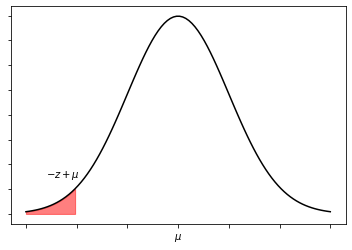

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.stats as stats
import math

inner="green"
outer="orange"

mu = 0
variance = 1
sigma = math.sqrt(variance)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
x1 = x[(x >= -2) & (x <= 2)]
x2 = x[(x <= -2) | (x == x1[0])]
x3 = x[(x >= 2) | (x == x1[-1])]

x4 = x[x < 2]
x5 = x[x < -2]

y = stats.norm.pdf(x, mu, sigma)
y1 = y[np.argwhere((x >= -2) & (x <= 2))].T.flatten()
y2 = y[np.argwhere((x <= -2) | (x == x1[0]))].T.flatten()
y3 = y[np.argwhere((x >=  2) | (x == x1[-1]))].T.flatten()

y4 = y[np.argwhere(x < 2)].T.flatten()
y5 = y[np.argwhere(x < -2)].T.flatten()


n = plt.figure()

# inner_patch = mpatches.Patch(color=inner, label='Crossover')
# outer_patch = mpatches.Patch(color=outer, label='Mutation')
# plt.legend(handles=[inner_patch, outer_patch])

plt.plot(x, y, color="black")
# plt.fill_between(x1, y1, 0, alpha=0.7, color=inner)
# plt.fill_between(x2, y2, 0, alpha=0.7, color=outer)
# plt.fill_between(x3, y3, 0, alpha=0.7, color=outer)
# plt.fill_between(x4, y4, 0, alpha=0.5, color="blue")
plt.fill_between(x5, y5, 0, alpha=0.5, color="red")
plt.xticks(np.arange(7)-3, ["", "", "", r"$\mu$", "", "", ""])
plt.yticks(np.arange(0.0, 0.45, 0.05), [""]*9)
# plt.text(2, .075, r'$z+\mu$')
plt.text(-2.6, .075, r'$-z+\mu$')

plt.show()

In [37]:
n.savefig("cdf2.png", transparent=True, dpi=200)

In [49]:
y

array([0.00443185, 0.00530579, 0.00632878, 0.00752133, 0.00890582,
       0.0105065 , 0.01234943, 0.01446241, 0.01687483, 0.01961746,
       0.02272223, 0.02622189, 0.03014961, 0.03453857, 0.03942137,
       0.0448295 , 0.05079264, 0.05733801, 0.06448952, 0.07226707,
       0.08068571, 0.08975477, 0.09947714, 0.10984842, 0.12085626,
       0.13247967, 0.14468855, 0.15744319, 0.17069405, 0.18438164,
       0.1984366 , 0.21277993, 0.22732351, 0.24197072, 0.2566174 ,
       0.27115285, 0.28546117, 0.29942268, 0.31291556, 0.3258175 ,
       0.33800759, 0.34936814, 0.35978656, 0.36915722, 0.37738323,
       0.38437808, 0.3900672 , 0.39438923, 0.39729716, 0.39875915,
       0.39875915, 0.39729716, 0.39438923, 0.3900672 , 0.38437808,
       0.37738323, 0.36915722, 0.35978656, 0.34936814, 0.33800759,
       0.3258175 , 0.31291556, 0.29942268, 0.28546117, 0.27115285,
       0.2566174 , 0.24197072, 0.22732351, 0.21277993, 0.1984366 ,
       0.18438164, 0.17069405, 0.15744319, 0.14468855, 0.13247

In [38]:
from scipy.special import erfinv

In [39]:
erfinv(0.93400794494)

1.2999999999968652

In [40]:
import scipy.optimize

In [41]:
from scipy.special import erf

In [53]:
def Fxn(s):
    def F(x):
        return erf(x/np.sqrt(2)) + s - 1
    return F

In [61]:
scipy.optimize.broyden2(Fxn(0.0), [1])

array([1.81190499])

In [45]:
Fxn(0.95)

<function __main__.Fxn.<locals>.F(x)>

In [65]:
def float_crossover(mom, dad, n):
    avg = (mom + dad) / 2
    std = abs(mom - dad) / (2 * n)
    return np.random.normal(avg, std)

In [78]:
def plot_dist(loops, n, mom=0, dad=1):
    y = []
    for _ in range(loops):
        y += [float_crossover(mom, dad, n)]
    
    y = np.asarray(y)
    return len(y[(y < mom) | (y > dad)])/loops

In [79]:
plot_dist(100000,1.81190499, 1.5, 3)

0.0702

In [88]:
def test_fxn(p, loops, mom=0, dad=1):
    a = scipy.optimize.broyden1(Fxn(p),[1])[0]
    return plot_dist(loops, a, mom, dad) - p

In [97]:
test_fxn(0.9, 100000, -20, 20)

0.0014600000000000168

In [93]:
s

NameError: name 's' is not defined

In [1]:
import ets_fitness

In [3]:
k = ets_fitness.float_crossover_mutation(0.05)

In [6]:
k(3, 5)

4.054848120829439